In [1]:
import torch
import matplotlib.pyplot as plt
from torch import nn
torch.__version__

'2.6.0+cu124'

In [2]:
device ="cuda" if torch.cuda.is_available() else "cpu" # Device Agnostic Setup
print(f"Using device {device}")

Using device cuda


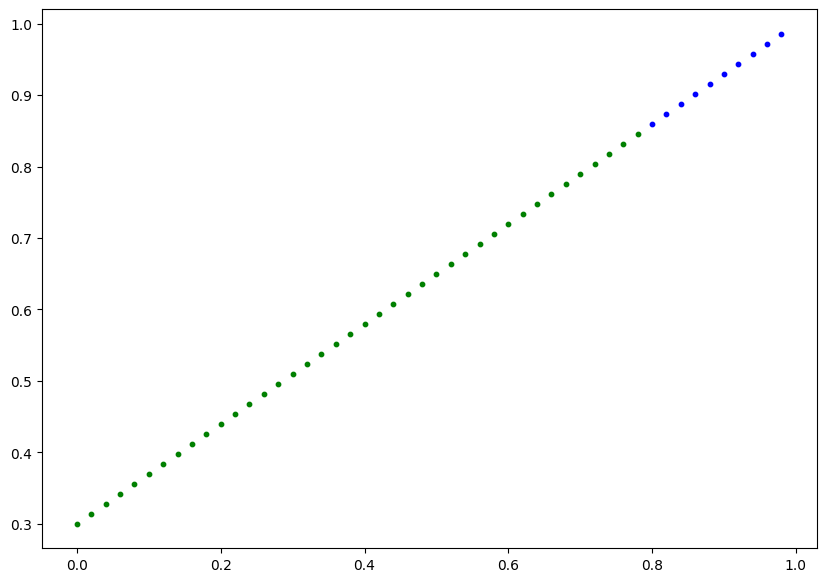

In [14]:
# Creating a dummy dataset using Linear Regression

bias=0.3
weight=0.7
X=torch.arange(0,1,0.02).unsqueeze(dim=1)
y=weight*X+bias
train_split=int(0.8*len(X))
x_train,y_train=X[:train_split],y[:train_split]
x_test,y_test=X[train_split:],y[train_split:]
len(x_train),len(y_train),len(x_test),len(y_test)


# Plotting Data
def plot(x_train,x_test,y_test,y_train, predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(x_train, y_train, c="g",s=10, label="Training Data")
  plt.scatter(x_test, y_test, c="b", s=10, label="Testing Data")
  if predictions is not None:
    plt.scatter(y_test,predictions, c="r",s=10, label= "Predictions")
    plt.legend()
  plt.show()
plot(x_train,x_test,y_test,y_train)

In [17]:
# Building a model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linearlayer=nn.Linear(in_features=1,out_features=1)
  def forward(self,x:torch.Tensor)-> torch.Tensor:
    return self.linearlayer(x)
torch.manual_seed(42)
model_0=LinearRegressionModel()
model_0.state_dict()




OrderedDict([('linearlayer.weight', tensor([[0.7645]])),
             ('linearlayer.bias', tensor([0.8300]))])

In [20]:
device
next(model_0.parameters()).device
model_0.to(device)
next(model_0.parameters()).device

device(type='cuda', index=0)

In [22]:
# Training Code
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.01)
epochs=200
#Data Agnostic
x_train=x_train.to(device)
x_test=x_test.to(device)
y_train=y_train.to(device)
y_test=y_test.to(device)

for epoch in range(epochs):
  model_0.train()
  y_pred=model_0(x_train)
  loss=loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  #Testing
  model_0.eval()
  with torch.inference_mode():
    test_pred=model_0(x_test)
    test_loss=loss_fn(test_pred,y_test)
  if epoch %10==0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch: 10 | Loss: 0.439968079328537 | Test Loss: 0.4392664134502411
Epoch: 20 | Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch: 30 | Loss: 0.20954833924770355 | Test Loss: 0.16984669864177704
Epoch: 40 | Loss: 0.09433845430612564 | Test Loss: 0.03513690456748009
Epoch: 50 | Loss: 0.023886388167738914 | Test Loss: 0.04784907028079033
Epoch: 60 | Loss: 0.019956795498728752 | Test Loss: 0.045803118497133255
Epoch: 70 | Loss: 0.016517987474799156 | Test Loss: 0.037530567497015
Epoch: 80 | Loss: 0.013089174404740334 | Test Loss: 0.02994490973651409
Epoch: 90 | Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703
Epoch: 100 | Loss: 0.006215683650225401 | Test Loss: 0.014086711220443249
Epoch: 110 | Loss: 0.00278724217787385 | Test Loss: 0.005814164876937866
Epoch: 120 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416882
Epoch: 130 | Loss: 0.0012645035749301314 | Test Loss: 0.013801801018416

In [23]:
model_0.state_dict()

OrderedDict([('linearlayer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linearlayer.bias', tensor([0.3025], device='cuda:0'))])

In [28]:
with torch.inference_mode():
  y_preds=model_0(x_test)
  y_preds

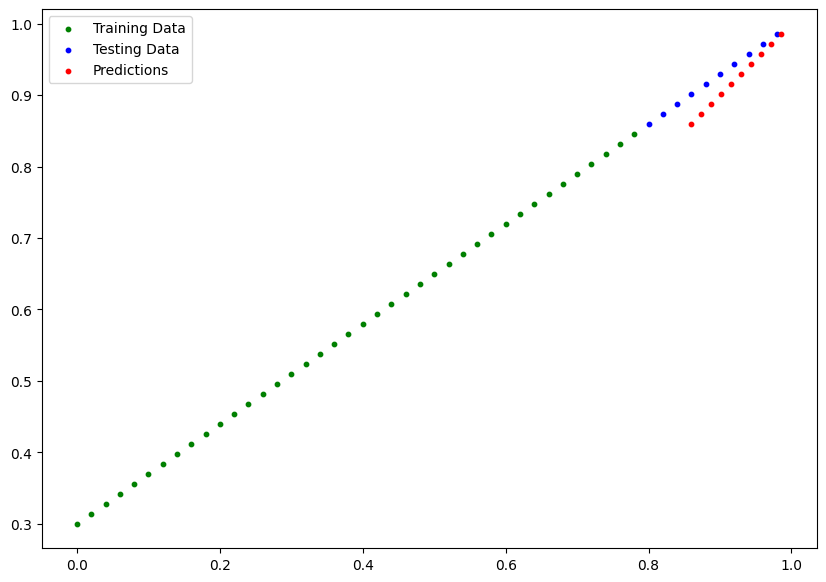

In [32]:
plot(predictions=y_preds.cpu(),x_train=x_train.cpu(),x_test=x_test.cpu(),y_train=y_train.cpu(),y_test=y_test.cpu())

In [39]:
#Saving and Loading
from pathlib import Path
MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME="Trained Another Model"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME
MODEL_SAVE_PATH
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)